In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/drive/MyDrive/NLP(Natural Language Processing)/archive (8)/emotion.txt",sep=";",names=["Description","Emotion"])
df.head()

,Description,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [4]:
df['Emotion'].value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Emotion, dtype: int64

In [5]:
#to check null values
df.isnull().sum()

Description    0
Emotion        0
dtype: int64

In [6]:
#Create WorldCloud means images
from wordcloud import WordCloud,STOPWORDS

In [7]:
W=''.join(df[df['Emotion']=="joy"]['Description'])

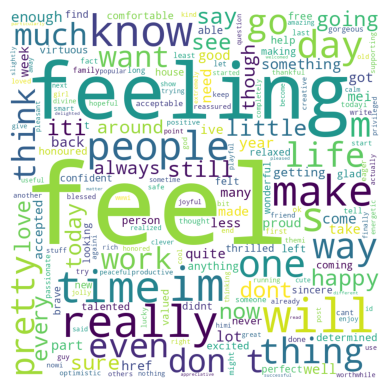

In [8]:
#create a object of WordCloud cladd and passing the following parameters
wc=WordCloud(width=800,height=800,background_color='white',stopwords=STOPWORDS,min_font_size=10)

#Create a wordcloud
wc.generate(W)
plt.imshow(wc)
plt.axis("off")
plt.show()

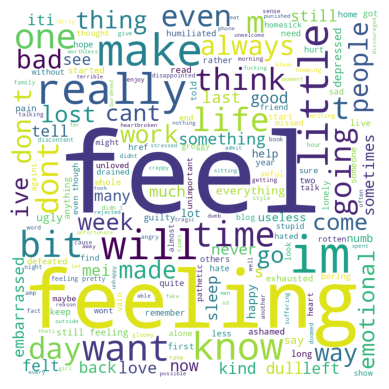

In [9]:
W=''.join(df[df['Emotion']=="sadness"]['Description'])
#create a object of WordCloud cladd and passing the following parameters
wc=WordCloud(width=800,height=800,background_color='white',stopwords=STOPWORDS,min_font_size=10)

#Create a wordcloud
wc.generate(W)
plt.imshow(wc)
plt.axis("off")
plt.show()

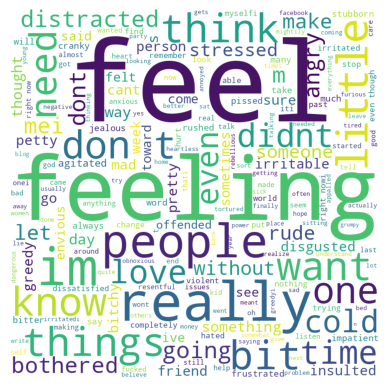

In [10]:
W=''.join(df[df['Emotion']=="anger"]['Description'])
#create a object of WordCloud cladd and passing the following parameters
wc=WordCloud(width=800,height=800,background_color='white',stopwords=STOPWORDS,min_font_size=10)

#Create a wordcloud
wc.generate(W)
plt.imshow(wc)
plt.axis("off")
plt.show()

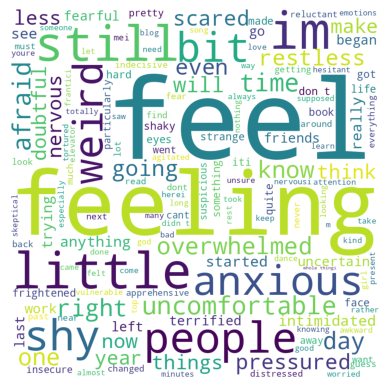

In [11]:
W=''.join(df[df['Emotion']=="fear"]['Description'])
#create a object of WordCloud cladd and passing the following parameters
wc=WordCloud(width=800,height=800,background_color='white',stopwords=STOPWORDS,min_font_size=10)

#Create a wordcloud
wc.generate(W)
plt.imshow(wc)
plt.axis("off")
plt.show()

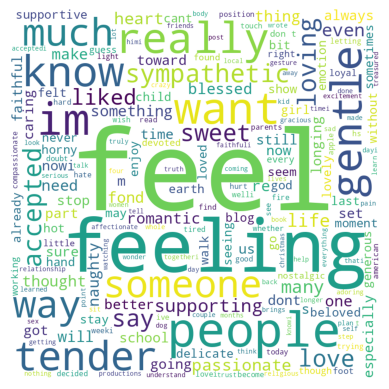

In [12]:
W=''.join(df[df['Emotion']=="love"]['Description'])
#create a object of WordCloud cladd and passing the following parameters
wc=WordCloud(width=800,height=800,background_color='white',stopwords=STOPWORDS,min_font_size=10)

#Create a wordcloud
wc.generate(W)
plt.imshow(wc)
plt.axis("off")
plt.show()

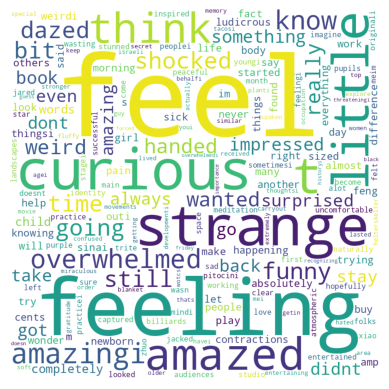

In [13]:
W=''.join(df[df['Emotion']=="surprise"]['Description'])
#create a object of WordCloud cladd and passing the following parameters
wc=WordCloud(width=800,height=800,background_color='white',stopwords=STOPWORDS,min_font_size=10)

#Create a wordcloud
wc.generate(W)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
#cleaning the data means preprocessing text means text means text mining
#create a user defined function
def clean_text(Description):
  #First convert given Description in lower case , using inbuilt function lower()
  Description=Description.lower()
  #second . apply tokenizer on given Description
  tokens=word_tokenize(Description)
  #Only retrieve aplphabets from given Descriptions and remove all number and special characters
  #from given Description
  Description=[w for w in tokens if w.isalpha()]

  #Next remove all stopwords in given Description
  #create boject of stopwords class
  stop=stopwords.words("english")
  Description=[w for w in Description if w not in stop]
  #Lemmatization
  #createobject of WordNetLemmatizer class
  lemma=WordNetLemmatizer()
  Description=[lemma.lemmatize(w) for w in Description]
  return ' '.join(Description)

In [16]:
#call function
df['Description']=df['Description'].apply(clean_text)

In [17]:
df.head()

,Description,Emotion
0,im feeling rather rotten im ambitious right,sadness
1,im updating blog feel shitty,sadness
2,never make separate ever want feel like ashamed,sadness
3,left bouquet red yellow tulip arm feeling slig...,joy
4,feeling little vain one,sadness


In [18]:
df.dtypes

Description    object
Emotion        object
dtype: object

In [19]:
X=df['Description'] #Input
Y=df['Emotion'] #Output 1D

In [20]:
#apply CountVectorizer to convert object type paragraph(Review) into number
from sklearn.feature_extraction.text import CountVectorizer
#create object of CountVectorizer class
cv=CountVectorizer()
X=cv.fit_transform(X)

In [21]:
X=X.toarray()
X.ndim

2

In [22]:
#train test split 70-30
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [23]:
#Classification aldorithm
from sklearn.metrics import classification_report,confusion_matrix
def create_model(model):
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  #generate report
  print(classification_report(Y_test,Y_pred))
  print(confusion_matrix(Y_test,Y_pred))
  return model

In [24]:
#First applying logisticRegression
#Calling the class
from sklearn.linear_model import LogisticRegression
#Create the object
lr=LogisticRegression()
#call the object in the function
lr=create_model(lr)

              precision    recall  f1-score   support

       anger       0.72      0.49      0.58        84
        fear       0.81      0.57      0.67        67
         joy       0.66      0.89      0.76       204
        love       0.69      0.21      0.32        53
     sadness       0.72      0.84      0.78       174
    surprise       1.00      0.11      0.20        18

    accuracy                           0.70       600
   macro avg       0.77      0.52      0.55       600
weighted avg       0.72      0.70      0.67       600

[[ 41   3  26   1  13   0]
 [  5  38  13   0  11   0]
 [  2   1 181   4  16   0]
 [  2   0  28  11  12   0]
 [  7   0  20   0 147   0]
 [  0   5   5   0   6   2]]


In [25]:
#First call the class
from sklearn.tree import DecisionTreeClassifier
#create the object
dt=DecisionTreeClassifier(random_state=1) #by deafult gini index
#calling the object in the function
dt=create_model(dt)

              precision    recall  f1-score   support

       anger       0.77      0.69      0.73        84
        fear       0.77      0.64      0.70        67
         joy       0.73      0.90      0.81       204
        love       0.72      0.53      0.61        53
     sadness       0.89      0.83      0.86       174
    surprise       0.50      0.56      0.53        18

    accuracy                           0.78       600
   macro avg       0.73      0.69      0.71       600
weighted avg       0.78      0.78      0.77       600

[[ 58   7   9   2   7   1]
 [  5  43  11   0   5   3]
 [  4   1 183   8   5   3]
 [  3   0  21  28   0   1]
 [  5   1  21   1 144   2]
 [  0   4   4   0   0  10]]
